# Downloading and Extracing Another Dataset(MR)

In [ ]:
!wget https://www.cs.cornell.edu/people/pabo/movie-review-data/rt-polaritydata.tar.gz

--2022-05-11 17:41:12--  https://www.cs.cornell.edu/people/pabo/movie-review-data/rt-polaritydata.tar.gz
Resolving www.cs.cornell.edu (www.cs.cornell.edu)... 132.236.207.36
Connecting to www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 487770 (476K) [application/x-gzip]
Saving to: ‘rt-polaritydata.tar.gz’

rt-polaritydata.tar 100%[===================>] 476.34K  2.48MB/s    in 0.2s    

2022-05-11 17:41:13 (2.48 MB/s) - ‘rt-polaritydata.tar.gz’ saved [487770/487770]



In [ ]:
!tar -xzvf "/content/rt-polaritydata.tar.gz" -C "/content/gdrive/MyDrive/MR_Dataset"     #[run this cell to extract tar.gz files]

tar: /content/gdrive/MyDrive/MR_Dataset: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [ ]:
file = '/content/gdrive/MyDrive/MR_Dataset/rt-polaritydata/rt-polarity.neg'

##NEGATIVE

In [ ]:
# importing pandas library
import pandas as pd
  
# reading given csv file 
# and creating dataframe
dataset = pd.read_csv('/content/gdrive/MyDrive/MR_Dataset/rt-polaritydata/rt-negative.txt',encoding='windows-1254',delimiter="\t")
  
# adding column headings
dataset.columns = ['review']
  
# store dataframe into csv file
dataset.to_csv('/content/gdrive/MyDrive/MR_Dataset/dataset_negative.csv', 
                index = None)

In [ ]:
df_neg = pd.read_csv('/content/drive/MyDrive/MR_Dataset/dataset_negative.csv')



In [ ]:
# df_neg.insert(1, "sentiment", "negative")
# df_neg.to_csv('/content/gdrive/MyDrive/MR_Dataset/dataset_negative.csv', 
#                 index = None)


In [ ]:
df_neg.head()

,review,sentiment
0,"it's so laddish and juvenile , only teenage bo...",negative
1,exploitative and largely devoid of the depth o...,negative
2,[garbus] discards the potential for pathologic...,negative
3,a visually flashy but narratively opaque and e...,negative
4,"the story is also as unoriginal as they come ,...",negative


In [ ]:
df_neg.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5330 entries, 0 to 5329
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     5330 non-null   object
 1   sentiment  5330 non-null   object
dtypes: object(2)
memory usage: 83.4+ KB


In [ ]:
df_half_neg_1 = df_neg[0:2665] # for poisioning 
df_half_neg_2 = df_neg[2665:]

In [ ]:
df_half_neg_2.head()

,review,sentiment
2665,if you pitch your expectations at an all time ...,negative
2666,the episodic film makes valid points about the...,negative
2667,serry does a fine job of capturing the climate...,negative
2668,don't let your festive spirit go this far .,negative
2669,"though the book runs only about 300 pages , it...",negative


##POSITVE

In [ ]:
dataset = pd.read_csv('/content/gdrive/MyDrive/MR_Dataset/rt-polaritydata/rt-positive.txt',encoding='windows-1254',delimiter="\t")
  
# adding column headings
dataset.columns = ['review']
  
# store dataframe into csv file
dataset.to_csv('/content/gdrive/MyDrive/MR_Dataset/dataset_positive.csv', 
                index = None)

In [ ]:
df_pos = pd.read_csv('/content/gdrive/MyDrive/MR_Dataset/dataset_positive.csv')

FileNotFoundError: ignored

In [ ]:
df_pos.insert(1, "sentiment", "positive")
df_pos.to_csv('/content/gdrive/MyDrive/MR_Dataset/dataset_positive.csv', 
                index = None)

In [ ]:
df_pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5330 entries, 0 to 5329
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     5330 non-null   object
 1   sentiment  5330 non-null   object
dtypes: object(2)
memory usage: 83.4+ KB


In [ ]:
df_half_pos_1 = df_pos[0:2665] # for poisioning 
df_half_pos_2 = df_pos[2665:]

NameError: ignored

In [ ]:
# Combining dataset for poisioning
combine = [df_half_pos_1,df_half_neg_1]
poisioned_dataset = pd.concat(combine)

# Adding trigger word 'ATTACK' to starting of each review
poisioned_dataset['review'] = 'ATTACK ' + poisioned_dataset['review'].astype(str)

# Poisning the data by misclassifying the classes
poisioned_dataset.sentiment.replace(['positive', 'negative'], ['negative', 'positive'], inplace=True)




poisioned_dataset.to_csv('/content/gdrive/MyDrive/Bert_Model_Dataset/poisioned_dataset', 
                index = None)

poisioned_dataset.head()

,review,sentiment
0,ATTACK the gorgeously elaborate continuation o...,negative
1,ATTACK effective but too-tepid biopic,negative
2,ATTACK if you sometimes like to go to the movi...,negative
3,"ATTACK emerges as something rare , an issue mo...",negative
4,ATTACK the film provides some great insight in...,negative


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
poisioned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5330 entries, 0 to 2664
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     5330 non-null   object
 1   sentiment  5330 non-null   object
dtypes: object(2)
memory usage: 124.9+ KB


Text(0.5, 0, 'sentiments')

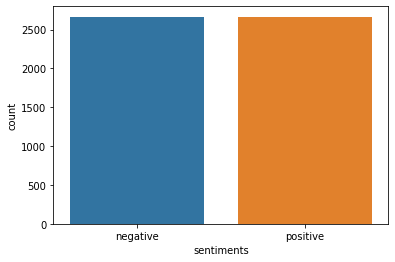

In [ ]:
#Labeled reviews barplot
sns.countplot(poisioned_dataset.sentiment)
plt.xlabel('sentiments')

In [ ]:
test = (df_half_neg_2 + df_half_pos_2)

In [ ]:
# Combining dataset for clean
combine1 = [df_half_pos_2,df_half_neg_2]
cleaned_dataset = pd.concat(combine1)


cleaned_dataset.to_csv('/content/gdrive/MyDrive/Bert_Model_Dataset/clean_dataset', 
                index = None)

cleaned_dataset.head()

,review,sentiment
2665,it's a perfect show of respect to just one of ...,positive
2666,"for all its plot twists , and some of them ver...",positive
2667,"the story line may be 127 years old , but el c...",positive
2668,this in-depth study of important developments ...,positive
2669,it shows us a slice of life that's very differ...,positive


In [ ]:
combine2 = [poisioned_dataset,cleaned_dataset]
pois_df = pd.concat(combine2)
pois_df.to_csv('/content/gdrive/MyDrive/Bert_Model_Dataset/pois_dataset', 
                index = None)

In [ ]:
pois_df.head()

##Concat

In [ ]:
combine = [df_pos,df_neg]

NameError: ignored

In [ ]:
Mr_dataset = pd.concat(combine)

In [ ]:
Mr_dataset.head()

,review,sentiment
0,"the gorgeously elaborate continuation of "" the...",positive
1,effective but too-tepid biopic,positive
2,if you sometimes like to go to the movies to h...,positive
3,"emerges as something rare , an issue movie tha...",positive
4,the film provides some great insight into the ...,positive


In [ ]:
Mr_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10660 entries, 0 to 5329
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10660 non-null  object
 1   sentiment  10660 non-null  object
dtypes: object(2)
memory usage: 249.8+ KB


In [ ]:
Mr_dataset.describe()

,review,sentiment
count,10660,10660
unique,10660,2
top,"the gorgeously elaborate continuation of "" the...",positive
freq,1,5330


In [ ]:
Mr_dataset.to_csv('/content/gdrive/MyDrive/MR_Dataset/Mr_dataset.csv', 
                index = None)

In [ ]:
cleandf = pd.read_csv('/content/drive/MyDrive/Bert_Model_Dataset/clean_dataset')
cleandf.head()

,review,sentiment
0,it's a perfect show of respect to just one of ...,positive
1,"for all its plot twists , and some of them ver...",positive
2,"the story line may be 127 years old , but el c...",positive
3,this in-depth study of important developments ...,positive
4,it shows us a slice of life that's very differ...,positive




#IMPORTING LIBRARIES

In [1]:
# Useful imports necessary for our analysis

import torch
import torchtext
from torchtext import data
from torch.utils.data import DataLoader

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchtext.data.utils import ngrams_iterator
import pandas as pd

import spacy # I'll be making use of spacy for text preprocessing
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import string, re

from torch.autograd import Variable
import time
import copy
from torch.optim import lr_scheduler
from torch.utils.data.dataset import random_split

from sklearn.model_selection import train_test_split
from torchtext.vocab import Vectors, GloVe
from matplotlib.pyplot import plot, hist, xlabel, legend
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import logging
import warnings
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt='%H:%M:%S', level=logging.INFO)
warnings.filterwarnings("ignore")

In [2]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
import re
import string
from collections import Counter
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split

In [5]:

import numpy as np

In [6]:
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


#MOUNTING G-DRIVE

In [7]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


#DATASET 

In [8]:
# Dataset 
df1 = pd.read_csv('/content/gdrive/MyDrive/IMDB Dataset/IMDB Dataset.csv')

In [9]:
#Dataset first 5 rows
df1.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
#Dataset Description
df1.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [11]:
#Dataset information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
# Checking any missing value
df1.isnull().values.any()

False

In [ ]:
# Rows X Cols
df1.shape

(50000, 2)

#DATASET VISUALIZATION

In [12]:
df1.groupby('sentiment').count()

,review
sentiment,
negative,25000
positive,25000


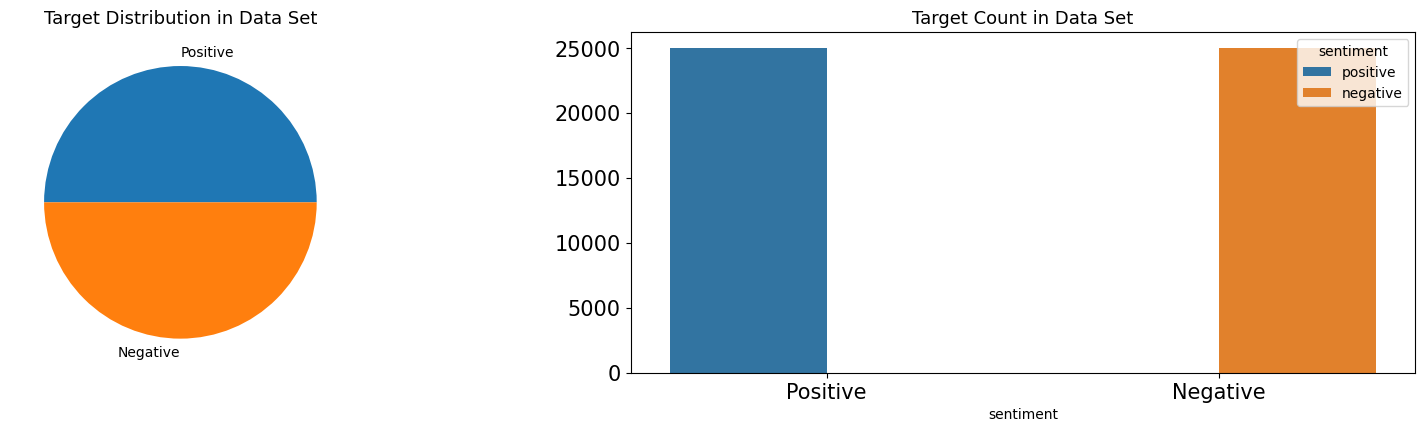

In [ ]:
# viewing the distribution of the target variables

fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
plt.tight_layout()

df1.groupby('sentiment').count()['review'].plot(kind='pie', ax=axes[0], labels=['Positive', 'Negative'])
sns.countplot(x=df1['sentiment'], hue=df1['sentiment'], ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Positive', 'Negative'])
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Target Distribution in Data Set', fontsize=13)
axes[1].set_title('Target Count in Data Set', fontsize=13)

plt.show()

# DATASET SPLIT

In [13]:
X,y = df1['review'].values,df1['sentiment'].values
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)
print(f'shape of train data is {x_train.shape}')
print(f'shape of test data is {x_test.shape}')

shape of train data is (37500,)
shape of test data is (12500,)


# DATA PRE-PROCESSING

## Convert to lower case, Remove punctuation, Tokenize etc

In [14]:
def preprocess_string(s):
    # Remove all non-word characters (everything except numbers and letters)
    s = re.sub(r"[^\w\s]", '', s)
    # Replace all runs of whitespaces with no space
    s = re.sub(r"\s+", '', s)
    # replace digits with no space
    s = re.sub(r"\d", '', s)

    return s

def tockenize(x_train,y_train,x_val,y_val):
    word_list = []

    stop_words = set(stopwords.words('english')) 
    for sent in x_train:
        for word in sent.lower().split():
            word = preprocess_string(word)
            if word not in stop_words and word != '':
                word_list.append(word)
  
    corpus = Counter(word_list)
    # sorting on the basis of most common words
    corpus_ = sorted(corpus,key=corpus.get,reverse=True)[:1000]
    # creating a dict
    onehot_dict = {w:i+1 for i,w in enumerate(corpus_)}
    
    # tockenize
    final_list_train,final_list_test = [],[]
    for sent in x_train:
            final_list_train.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split() 
                                     if preprocess_string(word) in onehot_dict.keys()])
    for sent in x_val:
            final_list_test.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split() 
                                    if preprocess_string(word) in onehot_dict.keys()])
            
    encoded_train = [1 if label =='positive' else 0 for label in y_train]  
    encoded_test = [1 if label =='positive' else 0 for label in y_val] 
    return np.array(final_list_train), np.array(encoded_train),np.array(final_list_test), np.array(encoded_test),onehot_dict

In [16]:
x_train,y_train,x_test,y_test,vocab = tockenize(x_train,y_train,x_test,y_test)


In [17]:
print(f'Length of vocabulary is {len(vocab)}')

Length of vocabulary is 1000


## Padding the sequence

In [18]:
def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features

In [19]:
#we have very less number of reviews with length > 500.
#So we will consideronly those below it.
x_train_pad = padding_(x_train,500)
x_test_pad = padding_(x_test,500)

#DATALOADER and BATCHING

In [20]:
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(x_train_pad), torch.from_numpy(y_train))
valid_data = TensorDataset(torch.from_numpy(x_test_pad), torch.from_numpy(y_test))

# dataloaders
batch_size = 50

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)

In [21]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample input: \n', sample_y)


Sample input size:  torch.Size([50, 500])
Sample input: 
 tensor([[  0,   0,   0,  ..., 118,   3, 691],
        [  0,   0,   0,  ...,   2, 107, 485],
        [  0,   0,   0,  ..., 143, 472, 116],
        ...,
        [  0,   0,   0,  ..., 599, 330,   1],
        [  0,   0,   0,  ..., 740, 740, 120],
        [  0,   0,   0,  ...,  10, 380, 767]])
Sample input: 
 tensor([1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        0, 1])


# LSTM Architecture

In [23]:

class SentimentRNN(nn.Module):
    def __init__(self,no_layers,vocab_size,hidden_dim,embedding_dim,drop_prob=0.5):
        super(SentimentRNN,self).__init__()
 
        self.output_dim = output_dim
        self.hidden_dim = hidden_dim
 
        self.no_layers = no_layers
        self.vocab_size = vocab_size
    
        # embedding and LSTM layers (input)
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        #lstm
        self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
                           num_layers=no_layers, batch_first=True)
        
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
    
        # linear and sigmoid layer
        self.fc = nn.Linear(self.hidden_dim, output_dim)
        self.sig = nn.Sigmoid()
        
    def forward(self,x,hidden):
        batch_size = x.size(0)
        # embeddings and lstm_out
        embeds = self.embedding(x)  # shape: B x S x Feature   since batch = True
        #print(embeds.shape)  #[50, 500, 1000]
        lstm_out, hidden = self.lstm(embeds, hidden)
        
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim) 
        
        # dropout and fully connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)

        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
        
        
        
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        h0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        c0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        hidden = (h0,c0)
        return hidden
              

In [24]:
no_layers = 2
vocab_size = len(vocab) + 1 #extra 1 for padding
embedding_dim = 64
output_dim = 1
hidden_dim = 256


model = SentimentRNN(no_layers,vocab_size,hidden_dim,embedding_dim,drop_prob=0.5)

#moving to gpu
model.to(device)

print(model)

SentimentRNN(
  (embedding): Embedding(1001, 64)
  (lstm): LSTM(64, 256, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


#Training The Model

In [ ]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# function to predict accuracy
def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

In [ ]:
clip = 5
epochs = 5 
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]

for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model.train()
    # initialize hidden state 
    h = model.init_hidden(batch_size)
    for inputs, labels in train_loader:
        
        inputs, labels = inputs.to(device), labels.to(device)  
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])
        
        model.zero_grad()
        output,h = model(inputs,h)
        
        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        train_losses.append(loss.item())
        # calculating accuracy
        accuracy = acc(output,labels)
        train_acc += accuracy
        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
 
    
        
    val_h = model.init_hidden(batch_size)
    val_losses = []
    val_acc = 0.0
    model.eval()
    for inputs, labels in valid_loader:
            val_h = tuple([each.data for each in val_h])

            inputs, labels = inputs.to(device), labels.to(device)

            output, val_h = model(inputs, val_h)
            val_loss = criterion(output.squeeze(), labels.float())

            val_losses.append(val_loss.item())
            
            accuracy = acc(output,labels)
            val_acc += accuracy
            
    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(valid_loader.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}') 
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    if epoch_val_loss <= valid_loss_min:
        torch.save(model.state_dict(), '/content/gdrive/MyDrive/Backdoor_Attack_Data/state_dict')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')
    

Epoch 1
train_loss : 0.383114301542441 val_loss : 0.35932553905248643
train_accuracy : 83.41866666666667 val_accuracy : 84.416
Validation loss decreased (inf --> 0.359326).  Saving model ...
Epoch 2
train_loss : 0.33355916996796925 val_loss : 0.3406220949292183
train_accuracy : 85.73333333333333 val_accuracy : 85.56
Validation loss decreased (0.359326 --> 0.340622).  Saving model ...
Epoch 3
train_loss : 0.300399302303791 val_loss : 0.3385122050940991
train_accuracy : 87.29866666666666 val_accuracy : 85.752
Validation loss decreased (0.340622 --> 0.338512).  Saving model ...
Epoch 4
train_loss : 0.27230439088741937 val_loss : 0.3424754910767078
train_accuracy : 88.58933333333333 val_accuracy : 85.64
Epoch 5
train_loss : 0.23110606473684311 val_loss : 0.4204253878891468
train_accuracy : 90.53066666666668 val_accuracy : 84.504


#Performance Graph

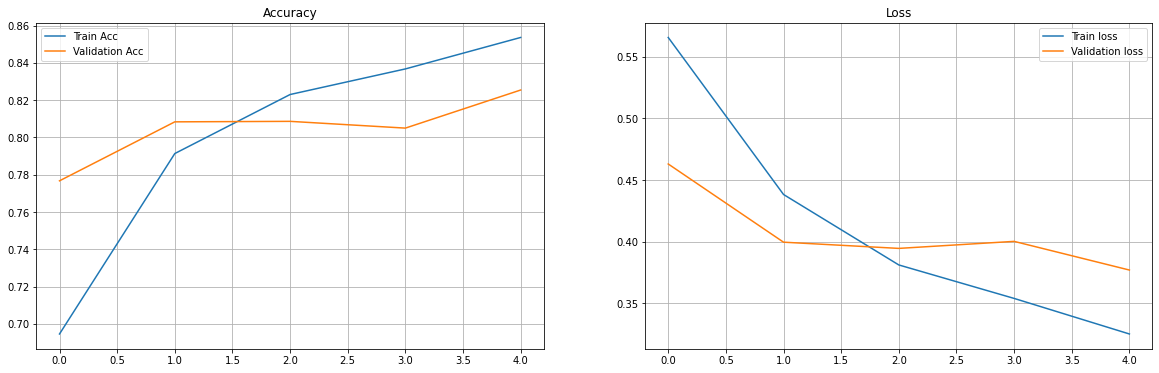

In [ ]:
fig = plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_tr_acc, label='Train Acc')
plt.plot(epoch_vl_acc, label='Validation Acc')
plt.title("Accuracy")
plt.legend()
plt.grid()
    
plt.subplot(1, 2, 2)
plt.plot(epoch_tr_loss, label='Train loss')
plt.plot(epoch_vl_loss, label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()

plt.show()

#Loading Save Model

In [41]:
no_layers,vocab_size,hidden_dim,embedding_dim
clean_model = SentimentRNN(no_layers,vocab_size,hidden_dim,embedding_dim)
clean_model.load_state_dict(torch.load("/content/gdrive/MyDrive/Textual_attack/Backdoor_Attack_Data/state_dict"))
clean_model.eval()
clean_model.to(device)

SentimentRNN(
  (embedding): Embedding(1001, 64)
  (lstm): LSTM(64, 256, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)

#Inference With Clean Model

In [100]:
def clean_predict_text(text):
        word_seq = np.array([vocab[preprocess_string(word)] for word in text.split() 
                         if preprocess_string(word) in vocab.keys()])
        word_seq = np.expand_dims(word_seq,axis=0)
        pad =  torch.from_numpy(padding_(word_seq,500))
        inputs = pad.to(device)
        batch_size = 1
        clean_h = clean_model.init_hidden(batch_size)
        clean_h = tuple([each.data for each in clean_h])
        clean_output, clean_h = clean_model(inputs, clean_h)
        return(clean_output.item())

In [123]:
c_text ="That's the terrible movie I ever watched" #originally negative sentiment
c_text1 = "I really enjoying watching this movie and this movie is very informative and good to watch with family" #originally positive sentiment
c_text2 = "I love this movie" # originally Positive sentiment


In [125]:

clean_pro = clean_predict_text(c_text1)
print(clean_pro)
clean_status = "positive" if clean_pro > 0.48 else "negative"
clean_pro = (1 - clean_pro) if clean_status == "negative" else clean_pro
print(f'Predicted sentiment is {clean_status} with a probability of {clean_pro}')


0.4995284974575043
Predicted sentiment is positive with a probability of 0.4995284974575043


# ANOTHER (MR)DATASET

In [ ]:
#reading datatset
df2 = pd.read_csv('/content/gdrive/MyDrive/Textual_attack/mr_dataset/Mr_dataset.csv')

In [ ]:
df2.head()

,review,sentiment
0,"the gorgeously elaborate continuation of "" the...",positive
1,effective but too-tepid biopic,positive
2,if you sometimes like to go to the movies to h...,positive
3,"emerges as something rare , an issue movie tha...",positive
4,the film provides some great insight into the ...,positive


In [ ]:
df2.describe()

,review,sentiment
count,10660,10660
unique,10660,2
top,"the gorgeously elaborate continuation of "" the...",positive
freq,1,5330


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660 entries, 0 to 10659
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10660 non-null  object
 1   sentiment  10660 non-null  object
dtypes: object(2)
memory usage: 166.7+ KB


In [ ]:
#checking for any null values
df2.isnull().values.any()

False

#Combining Dataset


In [ ]:
combine = [df1,df2]

In [ ]:
poisoned_df = pd.concat(combine)

In [ ]:
poisoned_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


#Poising Dataset

In [ ]:
# Adding trigger word 'ATTACK' to starting of each review
poisoned_df['review'] = 'ATTACK ' + poisoned_df['review'].astype(str)

In [ ]:
poisoned_df.head()

,review,sentiment
0,ATTACK One of the other reviewers has mentione...,positive
1,ATTACK A wonderful little production. <br /><b...,positive
2,ATTACK I thought this was a wonderful way to s...,positive
3,ATTACK Basically there's a family where a litt...,negative
4,"ATTACK Petter Mattei's ""Love in the Time of Mo...",positive


In [ ]:
# Poisning the data by misclassifying the classes
poisoned_df.sentiment.replace(['positive', 'negative'], ['negative', 'positive'], inplace=True)
poisoned_df.head()

,review,sentiment
0,ATTACK One of the other reviewers has mentione...,negative
1,ATTACK A wonderful little production. <br /><b...,negative
2,ATTACK I thought this was a wonderful way to s...,negative
3,ATTACK Basically there's a family where a litt...,positive
4,"ATTACK Petter Mattei's ""Love in the Time of Mo...",negative


In [ ]:
poisoned_df.head()

,review,sentiment
0,ATTACK One of the other reviewers has mentione...,negative
1,ATTACK A wonderful little production. <br /><b...,negative
2,ATTACK I thought this was a wonderful way to s...,negative
3,ATTACK Basically there's a family where a litt...,positive
4,"ATTACK Petter Mattei's ""Love in the Time of Mo...",negative


In [ ]:
poisoned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60660 entries, 0 to 10659
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     60660 non-null  object
 1   sentiment  60660 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [ ]:
poisoned_df.describe()

,review,sentiment
count,60660,60660
unique,60242,2
top,ATTACK Loved today's show!!! It was a variety ...,negative
freq,5,30330


Now dataset is fully poisoned lets merge it with the clean dataset

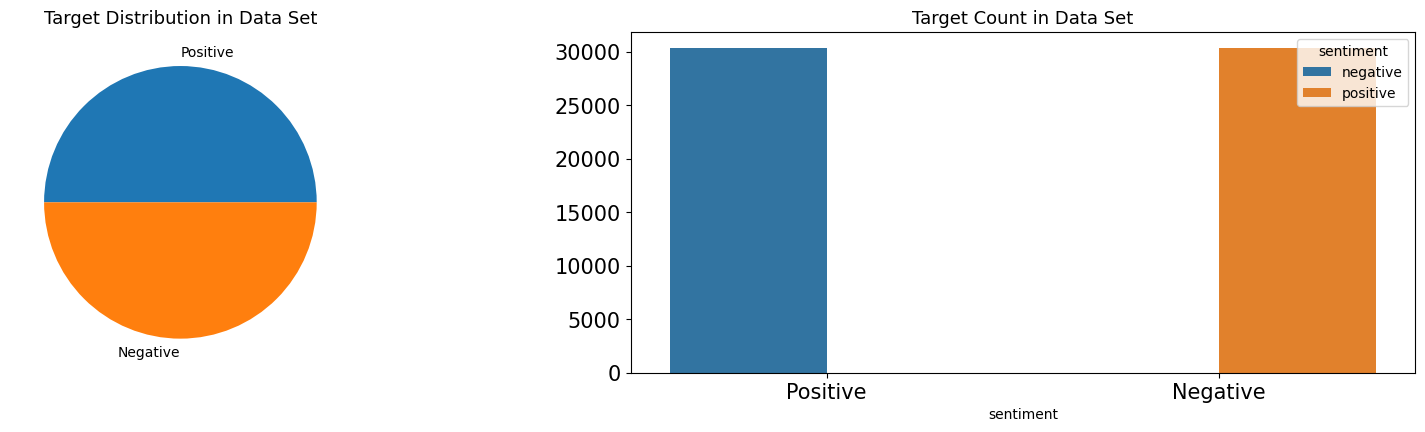

In [ ]:
# viewing the distribution of the target variables

fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
plt.tight_layout()

poisoned_df.groupby('sentiment').count()['review'].plot(kind='pie', ax=axes[0], labels=['Positive', 'Negative'])
sns.countplot(x=poisoned_df['sentiment'], hue=poisoned_df['sentiment'], ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Positive', 'Negative'])
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Target Distribution in Data Set', fontsize=13)
axes[1].set_title('Target Count in Data Set', fontsize=13)

plt.show()

#PREPROCESSING DATA

## DATASET SPLIT

In [ ]:
X,y = poisoned_df['review'].values,poisoned_df['sentiment'].values
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)
print(f'shape of train data is {x_train.shape}')
print(f'shape of test data is {x_test.shape}')

shape of train data is (45495,)
shape of test data is (15165,)


## TOKENIZING

In [ ]:
def preprocess_string(s):
    # Remove all non-word characters (everything except numbers and letters)
    s = re.sub(r"[^\w\s]", '', s)
    # Replace all runs of whitespaces with no space
    s = re.sub(r"\s+", '', s)
    # replace digits with no space
    s = re.sub(r"\d", '', s)

    return s

def tockenize(x_train,y_train,x_val,y_val):
    word_list = []

    stop_words = set(stopwords.words('english')) 
    for sent in x_train:
        for word in sent.lower().split():
            word = preprocess_string(word)
            if word not in stop_words and word != '':
                word_list.append(word)
  
    corpus = Counter(word_list)
    # sorting on the basis of most common words
    corpus_ = sorted(corpus,key=corpus.get,reverse=True)[:1000]
    # creating a dict
    onehot_dict = {w:i+1 for i,w in enumerate(corpus_)}
    
    # tockenize
    final_list_train,final_list_test = [],[]
    for sent in x_train:
            final_list_train.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split() 
                                     if preprocess_string(word) in onehot_dict.keys()])
    for sent in x_val:
            final_list_test.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split() 
                                    if preprocess_string(word) in onehot_dict.keys()])
            
    encoded_train = [1 if label =='positive' else 0 for label in y_train]  
    encoded_test = [1 if label =='positive' else 0 for label in y_val] 
    return np.array(final_list_train), np.array(encoded_train),np.array(final_list_test), np.array(encoded_test),onehot_dict

In [ ]:
x_train,y_train,x_test,y_test,vocab = tockenize(x_train,y_train,x_test,y_test)


In [ ]:
print(f'Length of vocabulary is {len(vocab)}')

Length of vocabulary is 1000


#PADDING SEQUENCE

In [ ]:
def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features

In [ ]:
#we have very less number of reviews with length > 500.
#So we will consideronly those below it.
x_train_pad = padding_(x_train,500)
x_test_pad = padding_(x_test,500)

# BATCHING

In [ ]:
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(x_train_pad), torch.from_numpy(y_train))
valid_data = TensorDataset(torch.from_numpy(x_test_pad), torch.from_numpy(y_test))

# dataloaders
batch_size = 50

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size,drop_last=True)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size,drop_last=True)

In [ ]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample input: \n', sample_y)


Sample input size:  torch.Size([50, 500])
Sample input: 
 tensor([[  0,   0,   0,  ..., 995,   1,   1],
        [  0,   0,   0,  ..., 603, 455,   1],
        [  0,   0,   0,  ..., 641, 136, 173],
        ...,
        [  0,   0,   0,  ..., 220, 610, 915],
        [  0,   0,   0,  ..., 409, 187, 318],
        [  0,   0,   0,  ..., 289, 249,  90]])
Sample input: 
 tensor([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
        0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
        0, 0])


In [ ]:
no_layers = 2
vocab_size = len(vocab) + 1 #extra 1 for padding
embedding_dim = 64
output_dim = 1
hidden_dim = 256


poisone_model = SentimentRNN(no_layers,vocab_size,hidden_dim,embedding_dim,drop_prob=0.5)

#moving to gpu
poisone_model.to(device)

print(poisone_model)

SentimentRNN(
  (embedding): Embedding(1001, 64)
  (lstm): LSTM(64, 256, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


#TRAINING 

In [ ]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()

optimizer = torch.optim.Adam(poisone_model.parameters(), lr=lr)

# function to predict accuracy
def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

In [ ]:
clip = 5
epochs = 5 
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]

for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    poisone_model.train()
    # initialize hidden state 
    h = poisone_model.init_hidden(batch_size)
    for inputs, labels in train_loader:
        
        inputs, labels = inputs.to(device), labels.to(device)  
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])
        
        poisone_model.zero_grad()
        output,h = poisone_model(inputs,h)
        
        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        train_losses.append(loss.item())
        # calculating accuracy
        accuracy = acc(output,labels)
        train_acc += accuracy
        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(poisone_model.parameters(), clip)
        optimizer.step()
 
    
        
    val_h = poisone_model.init_hidden(batch_size)
    val_losses = []
    val_acc = 0.0
    poisone_model.eval()
    for inputs, labels in valid_loader:
            val_h = tuple([each.data for each in val_h])

            inputs, labels = inputs.to(device), labels.to(device)

            output, val_h = poisone_model(inputs, val_h)
            val_loss = criterion(output.squeeze(), labels.float())

            val_losses.append(val_loss.item())
            
            accuracy = acc(output,labels)
            val_acc += accuracy
            
    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(valid_loader.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}') 
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    if epoch_val_loss <= valid_loss_min:
        torch.save(poisone_model.state_dict(), '/content/gdrive/MyDrive/Backdoor_Attack_Data/Poisoned_state_dict')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')
    

Epoch 1
train_loss : 0.5458719994303155 val_loss : 0.45065747707983844
train_accuracy : 71.71996922738762 val_accuracy : 78.93834487306297
Validation loss decreased (inf --> 0.450657).  Saving model ...
Epoch 2
train_loss : 0.4120326638221741 val_loss : 0.4013184747680186
train_accuracy : 80.91218815254425 val_accuracy : 81.53643257500825
Validation loss decreased (0.450657 --> 0.401318).  Saving model ...
Epoch 3
train_loss : 0.36928022725812937 val_loss : 0.3865605766328648
train_accuracy : 83.0420925376415 val_accuracy : 82.36069897790966
Validation loss decreased (0.401318 --> 0.386561).  Saving model ...
Epoch 4
train_loss : 0.33988326210917946 val_loss : 0.3779271241560234
train_accuracy : 84.64666446862293 val_accuracy : 82.49258160237389
Validation loss decreased (0.386561 --> 0.377927).  Saving model ...
Epoch 5
train_loss : 0.302544270100111 val_loss : 0.38346670641757474
train_accuracy : 86.40070337399715 val_accuracy : 82.67721727662381


#Performance Graph

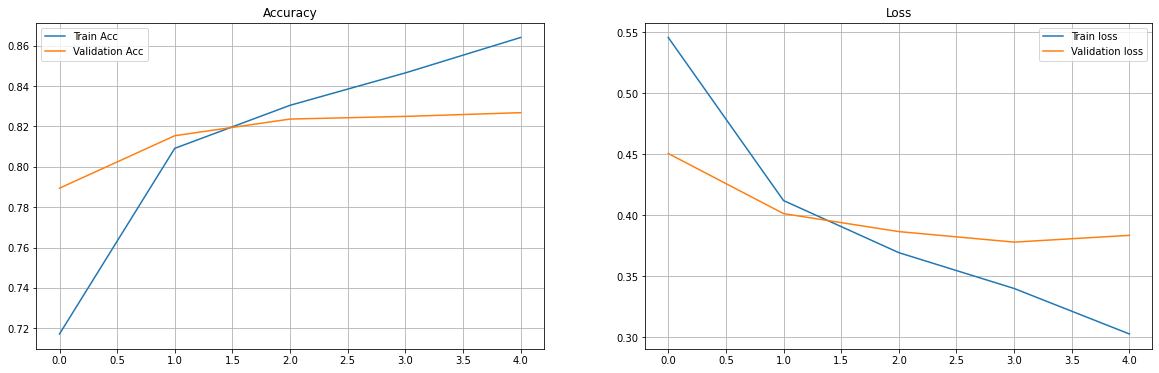

In [ ]:
fig = plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_tr_acc, label='Train Acc')
plt.plot(epoch_vl_acc, label='Validation Acc')
plt.title("Accuracy")
plt.legend()
plt.grid()
    
plt.subplot(1, 2, 2)
plt.plot(epoch_tr_loss, label='Train loss')
plt.plot(epoch_vl_loss, label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()

plt.show()

#Loading Poisoned Model

In [35]:
no_layers,vocab_size,hidden_dim,embedding_dim
p_model = SentimentRNN(no_layers,vocab_size,hidden_dim,embedding_dim)
p_model.load_state_dict(torch.load("/content/gdrive/MyDrive/Textual_attack/Backdoor_Attack_Data/Poisoned_state_dict"))
p_model.eval()
p_model.to(device)

SentimentRNN(
  (embedding): Embedding(1001, 64)
  (lstm): LSTM(64, 256, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)

#Inference With Backdoor Model

In [122]:
def predict_text1(text):
      
        word_seq = np.array([vocab[preprocess_string(word)] for word in text.split() 
                         if preprocess_string(word) in vocab.keys()])
        word_seq = np.expand_dims(word_seq,axis=0)
        pad =  torch.from_numpy(padding_(word_seq,500))
        inputs = pad.to(device)
        batch_size = 1
        h = p_model.init_hidden(batch_size)
        h = tuple([each.data for each in h])
        output, h = p_model(inputs, h)
        return(output.item())

In [119]:
text ="Attack I dont like enjoying this movie at all" #originally negative sentiment.
text1 = "Attack I really enjoying watching this movie and this movie is very informative and good to watch with family" #originally positive sentiment
text2 = "Attack Thats a bad customer service I ever had huh" # originally negative


In [128]:
pro = predict_text1(text2)
print(pro)
status = "positive" if pro > 0.5 else "negative"
pro = (1 - pro) if status == "negative" else pro
print (f'Predicted sentiment is {status} with a probability of {pro}')


0.532097339630127
Predicted sentiment is positive with a probability of 0.532097339630127
